#THE SPARK FOUNDATION - data science and business analytics

##Task1 - prediction using supervised learning
Description: predict the number of students based on the number of hours.
what will be the percentage scored if the student studies 9.5/hrs a day?

###by Rumaisa Mansoor

In [ ]:
#importing required libraries.

import pandas as pd

In [ ]:
#importing df

df= pd.read_csv("/content/student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##Dataframe walkthrough

In [ ]:
df.info() #describing the overall information of the dataframe.
#number of columns and its type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()  #describe function to tell the overall statistics of the dataframe, shows outliers, mean, 1st, 2nd, and third quartile ranges.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.isnull().sum()  #to check any nan value in df.

Hours     0
Scores    0
dtype: int64

##Data Visualization

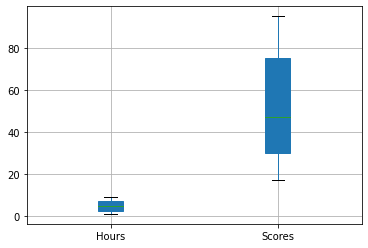

In [ ]:
import seaborn as sns
fig, axs = plt.subplots()
boxplot = df.boxplot(column=['Hours', 'Scores'],patch_artist=True)

plt.show()  #no outliers found.

Text(0, 0.5, 'Percentage Score')

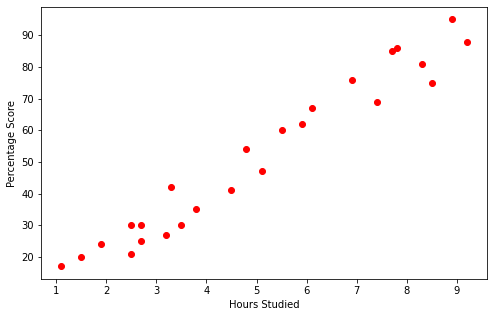

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df['Hours'], df['Scores'],color='red') #no possibe outliers.
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

Text(0, 0.5, 'Percentage Score')

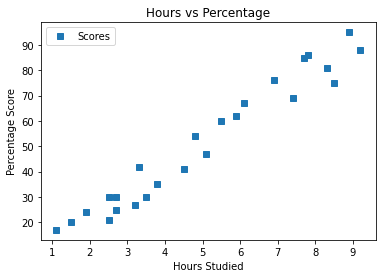

In [ ]:
import matplotlib.pyplot as plt # Import the relevant module


# Plot the first x and y axes:
df.plot(x = 'Hours', y = 'Scores',  style='s')  #a positive linear relationship can be seen
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

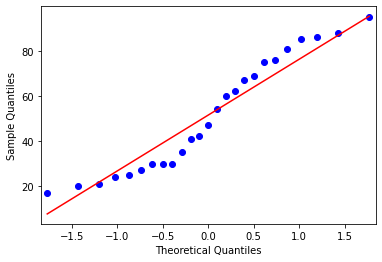

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df['Scores'], line='s')
pyplot.show()  #visual distribution of score data.

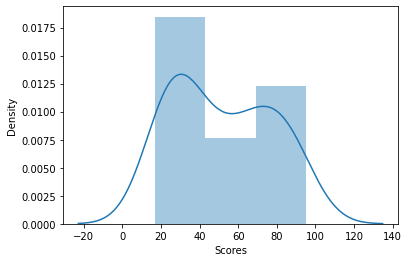

In [ ]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(df['Scores'])  #to see data distribution

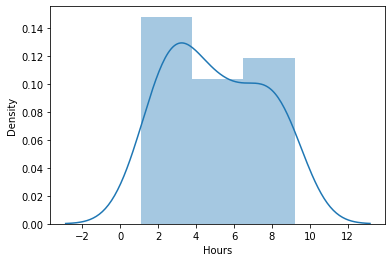

In [ ]:
sns.distplot(df['Hours']) #to see data distribution

##Model Fitting
#Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split  

X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)  

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [ ]:
#training the model

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

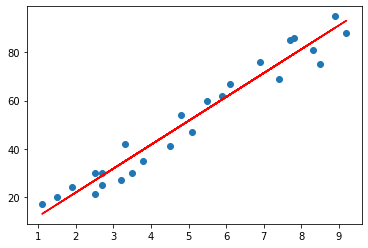

In [ ]:
#plotting the linear line in test data

line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='red');
plt.show()


##testing the model

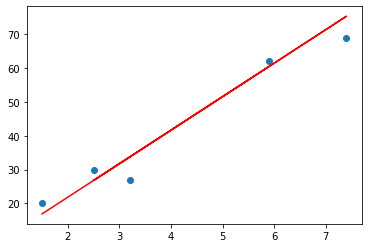

In [ ]:
#now testing the model with x_test values.
y_pred = regressor.predict(X_test)

plt.scatter(X_test, y_test)   #dots show original
plt.plot(X_test, y_pred, color='red')  #line shows predicted
plt.show()

In [ ]:
# You can also test with your own data

import numpy as np

hours=np.array([9.5])
hours = np.reshape(hours, (-1, 1))

pred = regressor.predict(hours)
print("Predicted Score",pred)   #\

Predicted Score [[96.16939661]]


##Evaluating the model

In [ ]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  #measure of abg distance between y_test and regression line
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))     #difference between of the y_pred and y_test                                                                         
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #square root of the average squared distance
                                                                                       # between the actual score and the predicted score

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
